In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

date = "240827"
box1 = "14"
box2 = "15"
cbox = box1
exp  = "ALDH7A1"

name          = date+"_"+box1+"_"+box2+"_"+exp
# combined_name = date+"_00_DATA.txt"
path          = name+"/"

In [3]:
# Load the activity data file
activity_file_path = path+date+"_00_DATA.txt"
activity_data = pd.read_csv(activity_file_path, delimiter="\t")

# Extract the time bins (assuming 'TIME(SECONDS)' is the relevant column)
time_bins_actual = pd.to_numeric(activity_data['TIME(SECONDS)'], errors='coerce').dropna()

# Convert time bins to Zeitgeber Time in hours (assuming time bins are in seconds)
zeitgeber_time_hours = time_bins_actual / 3600

/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_76757/2063440327.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  activity_data = pd.read_csv(activity_file_path, delimiter="\t")


In [5]:
# Load the genotype data
genotype_file_path = path+date+'_00genotype.txt'
genotype_data = pd.read_csv(genotype_file_path, delimiter="\t", skiprows=1)

# Rename columns for clarity
genotype_data.columns = ['wt', 'hom', 'het']

# Extract fish IDs for each genotype
wt_fish = genotype_data['wt'].dropna().astype(int).values
hom_fish = genotype_data['hom'].dropna().astype(int).values
het_fish = genotype_data['het'].dropna().astype(int).values

In [8]:
# Extract wild-type fish activity data based on fish IDs
wt_activity = activity_data[[f"FISH{fish}" for fish in wt_fish if f"FISH{fish}" in activity_data.columns]]

# Ensure only numeric columns are included
wt_activity = wt_activity.apply(pd.to_numeric, errors='coerce')

# Calculate mean activity for wild-type fish
wt_mean_activity = wt_activity.mean(axis=1)

<Figure size 1200x600 with 0 Axes>

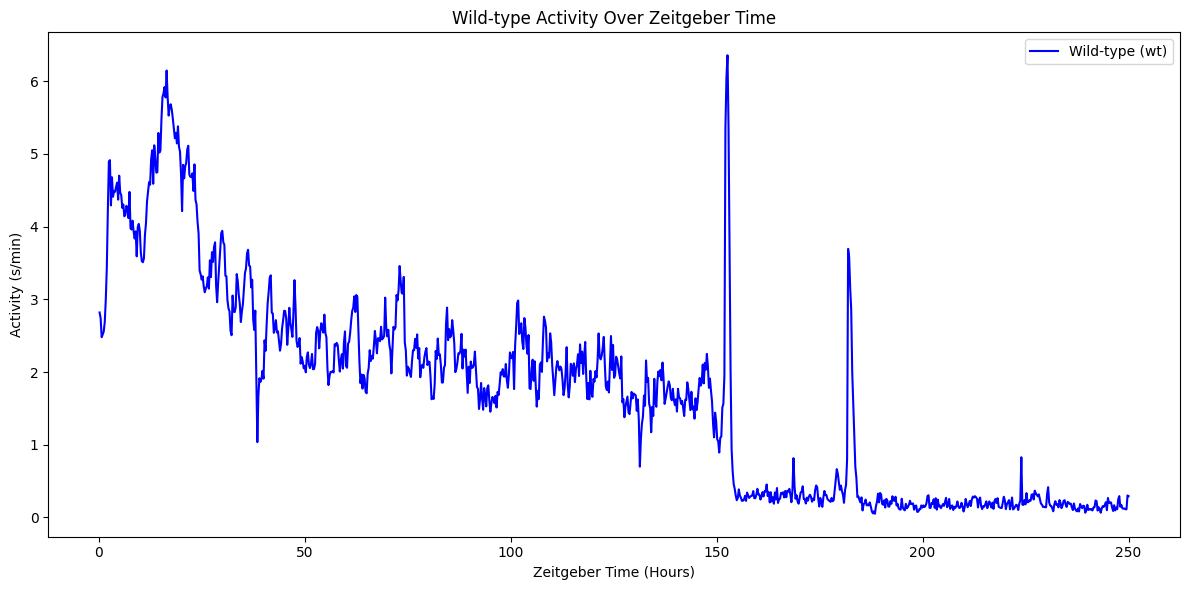

In [57]:
# Ensure both Zeitgeber time and activity data have the same length
min_length = min(len(zeitgeber_time_hours), len(wt_mean_activity))

# Trim both arrays to the same length
zeitgeber_time_hours = zeitgeber_time_hours[:min_length]
wt_mean_activity = wt_mean_activity[:min_length]

# Now, plot the trimmed data
plt.figure(figsize=(12, 6))

# Plot wild-type activity
# plt.plot(zeitgeber_time_hours, wt_mean_activity, label='Wild-type (wt)', color='blue')



# Trim the day-night cycle to match the length of Zeitgeber time
day_night_cycle = day_night_cycle[:len(zeitgeber_time_hours)]

# Plot the activity data
plt.figure(figsize=(12, 6))
plt.plot(zeitgeber_time_hours, wt_mean_activity, label='Wild-type (wt)', color='blue')

# Overlay the day-night cycle with reduced opacity
# plt.imshow([day_night_cycle], aspect='auto', cmap='binary', extent=[zeitgeber_time_hours.min(), zeitgeber_time_hours.max(), min(activity_data) - 0.5, max(activity_data) + 0.5], alpha=0.1)



# Add labels and title
plt.title('Wild-type Activity Over Zeitgeber Time')
plt.xlabel('Zeitgeber Time (Hours)')
plt.ylabel('Activity (s/min)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

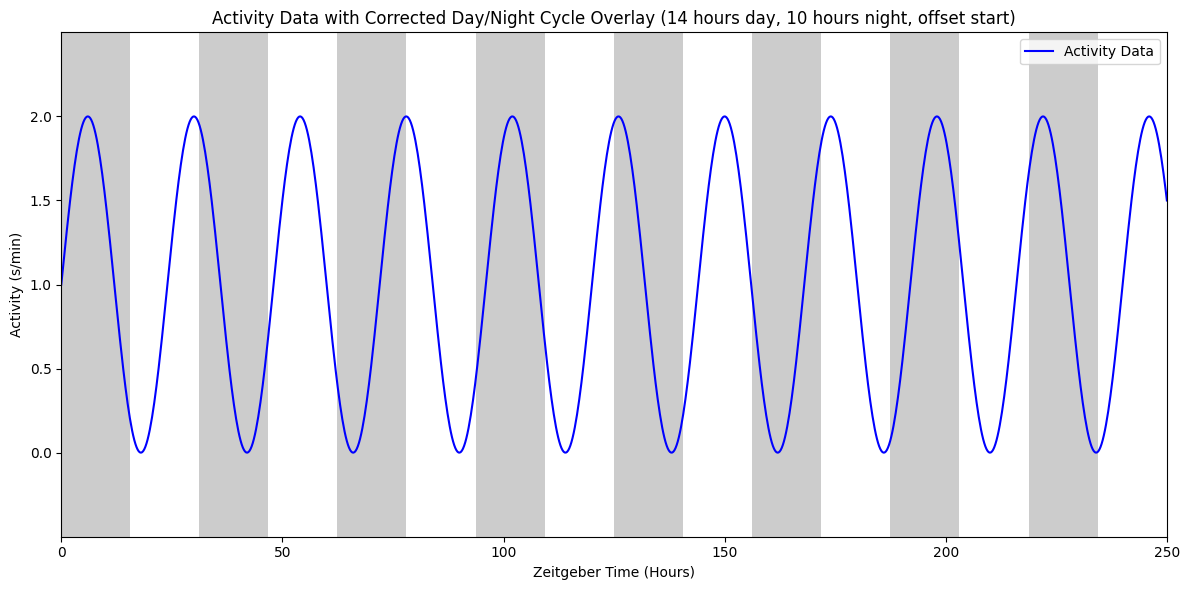

In [48]:
# Trim the day-night cycle to match the length of Zeitgeber time
day_night_cycle = day_night_cycle[:len(zeitgeber_time_hours)]

# Plot the activity data
plt.figure(figsize=(12, 6))
plt.plot(zeitgeber_time_hours, activity_data, label='Activity Data', color='blue')

# Overlay the day-night cycle with reduced opacity
plt.imshow([day_night_cycle], aspect='auto', cmap='binary', extent=[zeitgeber_time_hours.min(), zeitgeber_time_hours.max(), min(activity_data) - 0.5, max(activity_data) + 0.5], alpha=0.2)

# Add labels and title
plt.title('Activity Data with Corrected Day/Night Cycle Overlay (14 hours day, 10 hours night, offset start)')
plt.xlabel('Zeitgeber Time (Hours)')
plt.ylabel('Activity (s/min)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

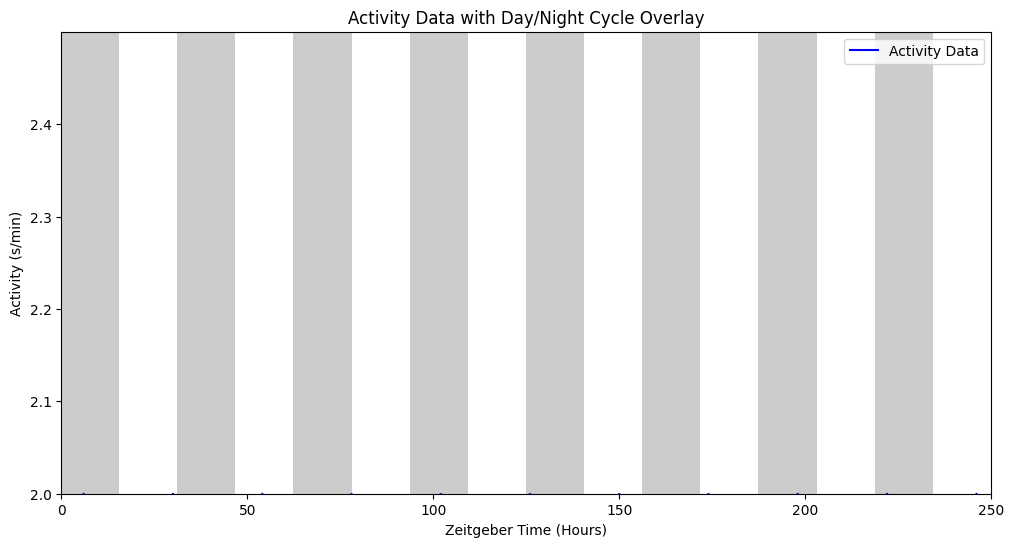

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have time and activity data
zeitgeber_time_hours = np.linspace(0, 250, 1000)  # Mock Zeitgeber Time in hours
activity_data = np.sin(zeitgeber_time_hours * 2 * np.pi / 24) + 1  # Mock activity data for demonstration

# Plot the activity data first
plt.figure(figsize=(12, 6))
plt.plot(zeitgeber_time_hours, activity_data, label='Activity Data', color='blue')

# Define the day-night cycle: 1 for light, 0 for dark, repeating every 12 hours
day_night_cycle = np.tile([1, 0], len(zeitgeber_time_hours) // 120)

# Overlay the day-night cycle on the plot
plt.imshow([day_night_cycle], aspect='auto', cmap='binary', extent=[zeitgeber_time_hours.min(), zeitgeber_time_hours.max(), max(activity_data), max(activity_data) + 0.5], alpha=0.2)

# Add labels and title
plt.title('Activity Data with Day/Night Cycle Overlay')
plt.xlabel('Zeitgeber Time (Hours)')
plt.ylabel('Activity (s/min)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

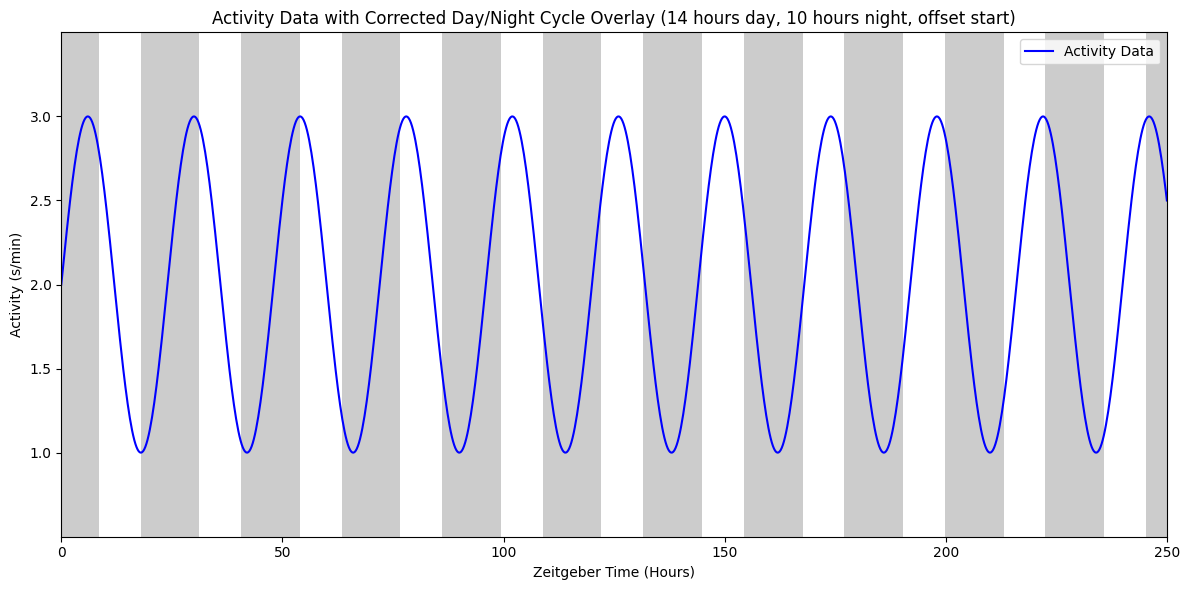

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Zeitgeber Time in hours (0 to 250 hours with 1000 points)
zeitgeber_time_hours = np.linspace(0, 250, 1000)  # 1000 data points over 250 hours

# Mock activity data for demonstration (sinusoidal activity over 24-hour period)
activity_data = np.sin(zeitgeber_time_hours * 2 * np.pi / 24) + 2  # Adding 2 to keep values positive

# Day-night cycle configuration
day_hours = 14  # 14 hours of day
night_hours = 10  # 10 hours of night
total_cycle_hours = day_hours + night_hours  # Total 24-hour cycle

# Set an offset: how many hours into the day the experiment starts (e.g., 5 hours into the day)
day_offset = 5  # Change this to match your experiment's start time

# Define the day-night cycle (one full cycle: 14 hours day, 10 hours night)
initial_cycle = np.concatenate([np.ones(day_hours), np.zeros(night_hours)])  # 14 hours of day and 10 hours of night
shifted_cycle = np.roll(initial_cycle, -day_offset)  # Shift the cycle by the offset

# Number of time points per hour (1000 points over 250 hours = 4 points per hour)
points_per_hour = len(zeitgeber_time_hours) / 250

# Number of points in one full 24-hour cycle
points_per_cycle = int(points_per_hour * total_cycle_hours)

# Generate the correct number of day-night cycles to cover the 250-hour period
cycles_needed = int(np.ceil(250 / total_cycle_hours))  # Number of 24-hour cycles needed for 250 hours
day_night_cycle = np.tile(shifted_cycle, cycles_needed)  # Repeat the cycle

# Trim the day-night cycle to match the length of Zeitgeber time
day_night_cycle = day_night_cycle[:len(zeitgeber_time_hours)]

# Plot the activity data
plt.figure(figsize=(12, 6))
plt.plot(zeitgeber_time_hours, activity_data, label='Activity Data', color='blue')

# Overlay the day-night cycle with reduced opacity
plt.imshow([day_night_cycle], aspect='auto', cmap='binary', extent=[zeitgeber_time_hours.min(), zeitgeber_time_hours.max(), min(activity_data) - 0.5, max(activity_data) + 0.5], alpha=0.2)

# Add labels and title
plt.title('Activity Data with Corrected Day/Night Cycle Overlay (14 hours day, 10 hours night, offset start)')
plt.xlabel('Zeitgeber Time (Hours)')
plt.ylabel('Activity (s/min)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
day_night_cycle


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])